House Prediction dataset

https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

The dataset contains house sale prices for King county, which includes Seattle.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# load data
df = pd.read_csv("../data/kc_house_data.csv")

In [39]:
# take a look at the dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [40]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Linear Regression

A method to help us understand the relationship between two variables:
- The predictor/independent variable (X)
- The response/dependent variable (Y)

The result of a linear regression is a function that predicts the response variable as a function of the predictor

$
\widehat{Y} = a + bx
$

- a refers to the intercept of the line
- b referes to the slope

In [57]:
from sklearn.linear_model import LinearRegression

In [42]:
# Create a linear regression object
lm = LinearRegression()
lm

LinearRegression()

### How could the `sqft_living` help us predict the house `price`?

In [43]:
X = df[['sqft_living']] # this needs to be a 2d Array
Y = df['price'] # this can be 1D

In [44]:
# Fit linear model
lm.fit(X,Y)

LinearRegression()

In [45]:
# Get the output prediction using X
Yhat = lm.predict(X)
# Print the first 5 results
Yhat[:5]

array([287555.06702452, 677621.82640197, 172499.40418656, 506441.44998452,
       427866.85097324])

In [46]:
# get the value of the intercept (a)
lm.intercept_

-43580.74309447361

In [47]:
# get the value of the slope (b)
lm.coef_

array([280.6235679])

Final estimated linear model

$
\widehat{Y} = a + bX
$

In our case, if we plug in the numbers:

$
price = -43580.74 + 280.62356X
$

In [48]:
Yhat = -43580.74 + (280.62356*X)
print(f'Using x price: {Yhat}')
# or using price
price = -43580.73 + 280.62356*df['sqft_living']
print(f'Using price = {price}')

Using x price:        sqft_living
0      287555.0608
1      677621.8092
2      172499.4012
3      506441.4376
4      427866.8408
...            ...
21608  385773.3068
21609  604659.6836
21610  242655.2912
21611  405416.9560
21612  242655.2912

[21613 rows x 1 columns]
Using price = 0        287555.0708
1        677621.8192
2        172499.4112
3        506441.4476
4        427866.8508
            ...     
21608    385773.3168
21609    604659.6936
21610    242655.3012
21611    405416.9660
21612    242655.3012
Name: sqft_living, Length: 21613, dtype: float64


# Task 1

Repeat process (Linear Model prediction) but using `bedrooms`as the independent variable and price as your dependent variable.

In [49]:
# 1. create the linear regression object
lmp = LinearRegression()
# 2. create your x and y -- we'll just reuse Y in this case
X = df[['bedrooms']]  # this needs to be a 2d Array
# 3. fit the model
lmp.fit(X, Y)
Yhat_2 = lmp.predict(X)

# get the value of the intercept (a) and the slope (b)
a = lmp.intercept_
b = lmp.coef_
# do the math, plug-and-chug the formula
Yhat_2 = a + (b*X)
print(Yhat_2)

            bedrooms
0      494950.735854
1      494950.735854
2      373234.609342
3      616666.862366
4      494950.735854
...              ...
21608  494950.735854
21609  616666.862366
21610  373234.609342
21611  494950.735854
21612  373234.609342

[21613 rows x 1 columns]


## Multiple Linear Regression

If you want to use more variables in our model to predict the price, then, use a `multiple linear regression`

$
\widehat{Y} = a + b_{1} + b_{2}X_{2} + b_{3}X_{3}...b_{n}X_{n}
$

In [61]:
#so it's like the same, but b is a list of a handful of points?

X = df[['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot']]
lm3 = LinearRegression()
lm3.fit(X, Y)
a = lm3.intercept_


In [62]:
# get the slopes b1, b2, b3, b4
bs = list(lm.coef_)
bs

[280.6235678974481]

In [63]:
Yhat = a + (bs[0]*X['sqft_living']) + bs[1]*X['bedrooms'] + bs[2]*X['bathrooms'] + bs[3]*X['sqft_lot']

IndexError: list index out of range

## Model Evaluation Using Visualization

## Regression Plot

Regression plots are a great tool to plot Linear regression. This plot shows a combination of a scatterp lot and a linear regression line.


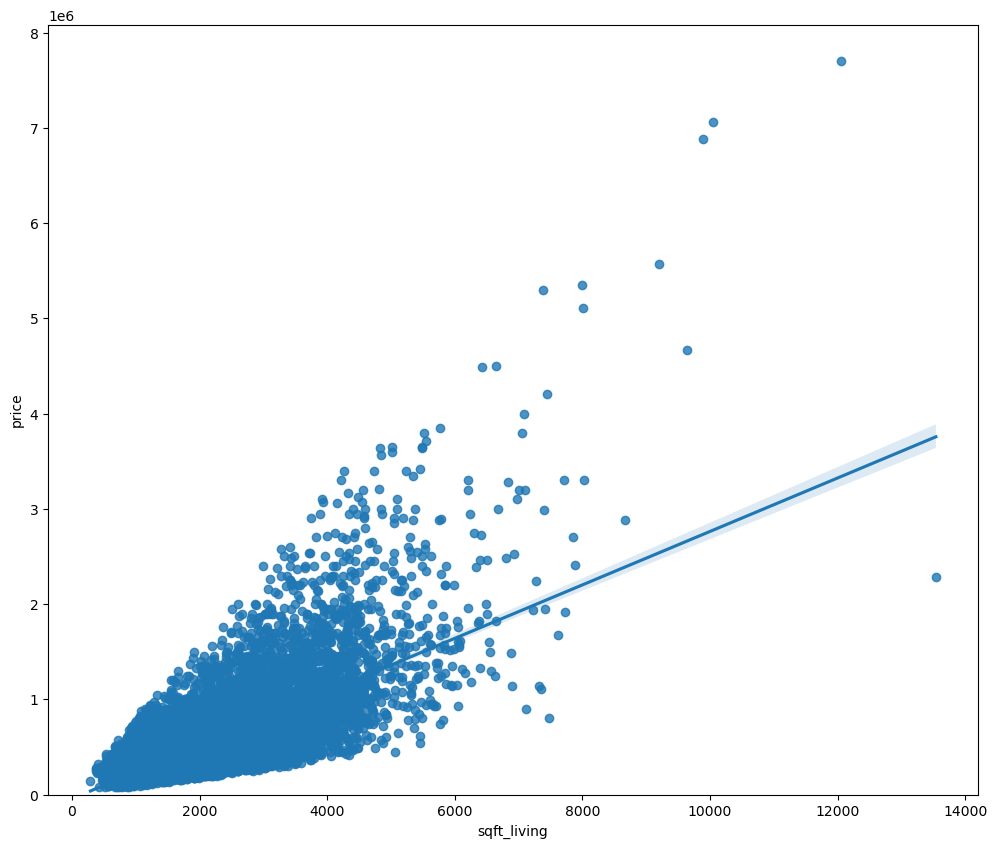

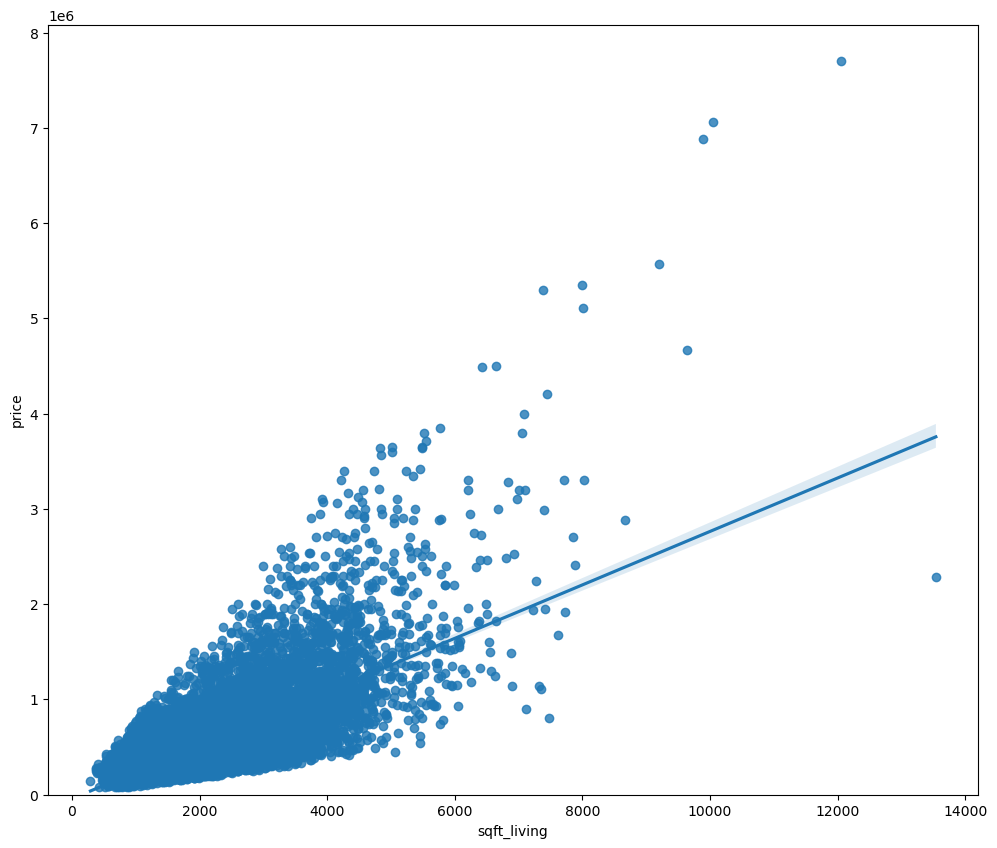

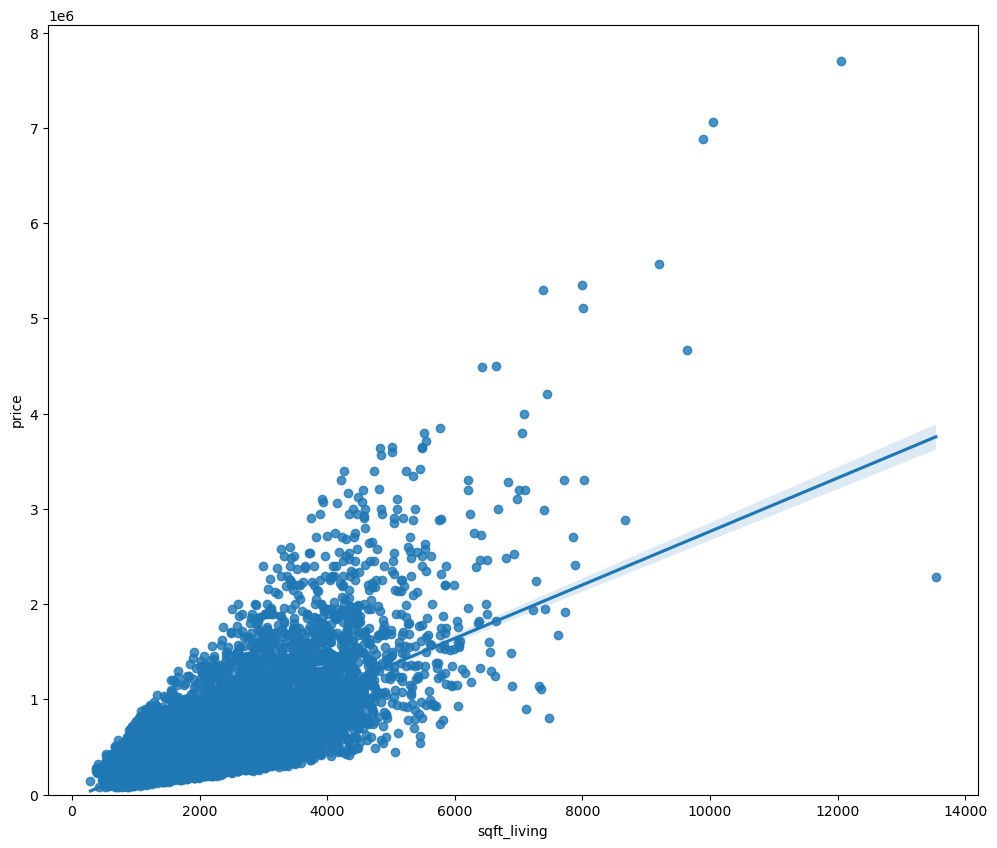

In [66]:
width = 12
height = 10
# plot the figure
plt.figure(figsize=(width, height))
sns.regplot(x = 'sqft_living', y = 'price', data = df)
plt.ylim(0,)
plt.show()

In [ ]:
# compare _ vs the price

### Residual Plot
This is a good way to visualize the `variance` of the data